# **Análisis Exploratorio de Datos con Python**
El presente cuaderno muestra las principales operaciones de *data wrangling* (manejo de dataframes), así como el cálculo de estadísticos descriptivos y la visualización de gráficos básicos, es decir, las operaciones que componen un análisis exploratorio de datos clásico.

### Librerías:

In [ ]:
import pandas as pd #Para el manejo de dataframes
import numpy as np #Para trabajar con arrays y para realizar operaciones matemáticas y estadísticas básicas
import matplotlib.pyplot as plt #Para realizar gráficos
import statistics #Para calcular estadísticos descriptivos

### Datos:

In [ ]:
np.random.seed(2021) #Establecemos una semilla para facilitar la reproductibilidad de los resultados

#Creamos un dataset con una columna de IDs, tres variables continuas (altura, sexo y edad) y una categórica (sexo), y 250 observaciones:
datos1 = pd.DataFrame(
    {
     "ID": range(1,251), #Los IDs serán los números entre 1 y 250 (ponemos 251, porque Python para de contar en el número anterior al que ponemos)
     "Sexo": np.random.choice(["Hombre", "Mujer"], 250), #Seleccionamos al azar, 250 veces, entre las categorías Hombre y Mujer
     "Altura": 165 + 30 * np.random.randn(250), #La altura sigue una normal N(165, 30)
     "Peso": 65 + 30 * np.random.randn(250), #El peso sigue una normal N(65, 30)
     "Edad": 30 + 15 * np.random.randn(250) #La edad sigue una normal N(30, 15)
     }
    )
print(datos1.head())
print("--------------------------------------------------")
#Creamos un segundo dataset con la misma estructura que el anterior, pero solo 50 observaciones:
datos2 = pd.DataFrame(
    {
     "ID": range(251,301), #Los IDs serán los números entre 251 y 300
     "Sexo": np.random.choice(["Hombre", "Mujer"], 50),
     "Altura": 165 + 30 * np.random.randn(50),
     "Peso": 65 + 30 * np.random.randn(50),
     "Edad": 30 + 15 * np.random.randn(50) 
     }
    )
print(datos2.head())
print("--------------------------------------------------")
#Creamos un tercer dataset con una columnas de IDs y columnas de Ingresos (continua) y Estatus laboral (Categórica), y 300 observaciones:
datos3 = pd.DataFrame(
    {
     "ID": range(1,301), #Los IDs serán los números entre 1 y 300
     "Ingresos":  15000 + 10000 * np.random.rand(300), #Los ingresos siguen una normal N(15000, 10000),
     "Estatus laboral": np.random.choice(["Parado", "Ocupado"], 300) #Seleccionamos al azar, 300 veces, entre las categorías Parado y Ocupado
     }
    )
print(datos3.head())

   ID    Sexo      Altura       Peso       Edad
0   1  Hombre  185.727733  58.319837  33.294234
1   2   Mujer  174.083282  78.117063  27.869190
2   3   Mujer  185.470747   3.295677  17.146505
3   4  Hombre  181.956833  82.945672  51.068359
4   5   Mujer  207.908197  63.128230  22.510396
--------------------------------------------------
    ID    Sexo      Altura       Peso       Edad
0  251   Mujer  227.768733  54.818062  43.425252
1  252  Hombre  133.942546  45.871465  45.990804
2  253  Hombre  174.339675  65.841400  30.304534
3  254   Mujer  157.363977  78.086351  53.396212
4  255   Mujer  131.077085  11.533090  26.337838
--------------------------------------------------
   ID      Ingresos Estatus laboral
0   1  18095.669454          Parado
1   2  15273.714829         Ocupado
2   3  18340.272891         Ocupado
3   4  21814.721938         Ocupado
4   5  22617.297292          Parado


### Concatenación de datasets:
Vamos a unir verticalmente (uno debajo del otro) los datasets *datos1* y *datos2*

In [ ]:
datos_1_2 = pd.concat([datos1, datos2], axis = 0) #axis = 0 porque estamos uniéndolos verticalmente (filas debajo de filas)
len(datos_1_2) #Comprobamos que la longitud del nuevo dataset es de 300
print(datos_1_2.head())

   ID    Sexo      Altura       Peso       Edad
0   1  Hombre  185.727733  58.319837  33.294234
1   2   Mujer  174.083282  78.117063  27.869190
2   3   Mujer  185.470747   3.295677  17.146505
3   4  Hombre  181.956833  82.945672  51.068359
4   5   Mujer  207.908197  63.128230  22.510396


### Unión (join) de datasets:
Vamos a unir el anterior dataset *datos_1_2* con el dataset *datos3* horizontalmente (columnas al lado de columnas), usando la columna de IDs como nexo de unión.

In [ ]:
datos_final = pd.merge(left = datos_1_2, right = datos3, left_on = "ID", right_on = "ID")
len(datos_final)
print(datos_final.head()) #Comprobamos que tenemos 300 observaciones y todas las columnas

   ID    Sexo      Altura       Peso       Edad      Ingresos Estatus laboral
0   1  Hombre  185.727733  58.319837  33.294234  18095.669454          Parado
1   2   Mujer  174.083282  78.117063  27.869190  15273.714829         Ocupado
2   3   Mujer  185.470747   3.295677  17.146505  18340.272891         Ocupado
3   4  Hombre  181.956833  82.945672  51.068359  21814.721938         Ocupado
4   5   Mujer  207.908197  63.128230  22.510396  22617.297292          Parado


### Cambiar nombre de filas y columnas del dataframe:
Como tenemos una columna de IDs identificativa de cada una de las 300 observaciones, vamos a cambiar el nombre de las filas (números del 0 al 299), por los valores de la columna *ID* (números del 1 al 300):

In [ ]:
datos_final.index = datos_final["ID"] #Renombramos el índice de las filas con los valores de la columna ID
#Eliminamos la columna ID, ya que no nos hace falta:
datos_final = datos_final.drop(["ID"], axis = 1)
#Para eliminar filas también se debe utilizar la funcion drop(): entre corchetes ponemos las filas a eliminar y especificamos axis = 0
#Cambiamos el nombre de la columna Ingresos por "Ingresos mensuales":
datos_final = datos_final.rename(columns = {"Ingresos": "Ingresos mensuales"})
print(datos_final.head())

      Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                      ...                                     
1   Hombre  185.727733  ...        18095.669454           Parado
2    Mujer  174.083282  ...        15273.714829          Ocupado
3    Mujer  185.470747  ...        18340.272891          Ocupado
4   Hombre  181.956833  ...        21814.721938          Ocupado
5    Mujer  207.908197  ...        22617.297292           Parado

[5 rows x 6 columns]


### Función describe()
Con las función describe() podemos obtener los estadísticos descriptivos básicos de forma muy rápida.

En el caso de las variables continuas nos da el recuento, la media, la mediana, la desviación típica, el máximo, el mínimo, los cuartiles y el tipo de dato.

En el caso de las categóricas, nos da el recuento, el número de categorías, la moda y la frecuencia de la moda.

In [ ]:
for i in datos_final.columns:
  print(datos_final[i].describe())

count       300
unique        2
top       Mujer
freq        163
Name: Sexo, dtype: object
count    300.000000
mean     163.695440
std       30.327469
min       77.359026
25%      142.205044
50%      163.740130
75%      185.700385
max      241.526719
Name: Altura, dtype: float64
count    300.000000
mean      64.233054
std       30.050969
min       -7.752129
25%       42.994083
50%       63.681800
75%       86.387175
max      145.600979
Name: Peso, dtype: float64
count    300.000000
mean      29.366473
std       14.637074
min       -8.911559
25%       19.775875
50%       30.512299
75%       38.982829
max       75.480454
Name: Edad, dtype: float64
count      300.000000
mean     19776.474496
std       2822.811845
min      15027.682134
25%      17402.160984
50%      19765.024738
75%      22386.375704
max      24917.822457
Name: Ingresos mensuales, dtype: float64
count         300
unique          2
top       Ocupado
freq          168
Name: Estatus laboral, dtype: object


### Medidas de centralidad por grupos:

In [ ]:
#Agrupamos los datos en función de las categorías, por ejemplo, de la variable Sexo
#Y calculamos la media y mediana por sexo de las distintas variables continuas:
datos_final.groupby(["Sexo"])[["Altura", "Peso", "Edad", "Ingresos mensuales"]].aggregate([np.mean, np.median])
#Para agrupar los datos en función de las categorías de una variable se utiliza la función groupby()
#La función aggregate() permite indicar la realización de varios cálculos a la vez
#Para calcular la moda debemos usar el paquete statistics (statistics.mode() o statistics.multimode()), pero no lo hemos hecho ya que, al ser datos aleatorios, no hay datos repetidos o éstos son mínimos

Altura              ... Ingresos mensuales              
              mean      median  ...               mean        median
Sexo                            ...                                 
Hombre  166.196455  167.468193  ...       19584.241734  19570.939465
Mujer   161.593360  158.866212  ...       19938.044363  20018.646068

[2 rows x 8 columns]

### Extracción de subconjunto de datos y medidas de dispersión de dicho subconjunto:


In [ ]:
#Utilizamos loc[] para la extracción de subconjuntos de datos:
#Vamos a extraer las filas 25 a 125 , y las columnas Altura y Peso
subconjunto = datos_final.loc[25:125,"Altura":"Peso"]
#También podríamos hacer usar de iloc[] para la extracción del mismo subconjunto de datos. En este caso, se debe explicitar el índice (número) de las columnas (en este caso la 1 y la 2):
subconjunto = datos_final.iloc[25:125,1:3] #Debemos poner hasta la 3, porque Python cuenta hasta la anterior de la 3
print(subconjunto.tail())
print("\n") #Para dejar un espacio en blanco con lo de abajo
#Calculamos ahora las principales medidas de dispersión (rango, varianza y desviación típica):
for i in subconjunto.columns:
  print("El rango de la variable " + i + " es " + str(round(subconjunto[i].max() - subconjunto[i].min(), 3))) #El resultado está redondeado a tres decimales
  print("La varianza de la variable " + i + " es " + str(round(statistics.variance(subconjunto[i]), 3)))
  print("La desviación típica de la variable " + i + " es " + str(round(statistics.stdev(subconjunto[i]), 3)))
  print("\n")
#En realidad, estamos calculando la cuasivarianza y cuasidesviación típica, ya que asumimos que los datos proceden de una muestra, no de una población entera
#Si quisiéramos hacer uso de la varianza y de la desviación típica poblacionales usamos las funciones pvariance() y pstdev() respectivamente

         Altura        Peso
ID                         
121  231.114021   25.214365
122  159.200312   69.612457
123  174.953245   19.978118
124  179.702948   57.049546
125  189.313006  118.555077


El rango de la variable Altura es 153.628
La varianza de la variable Altura es 1012.704
La desviación típica de la variable Altura es 31.823


El rango de la variable Peso es 134.214
La varianza de la variable Peso es 808.539
La desviación típica de la variable Peso es 28.435




### Histograma:

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Peso en kg')]

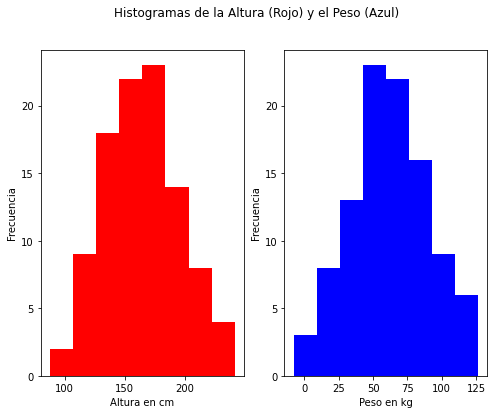

In [ ]:
#Vamos a graficar el histograma para la altura y el peso, usando el subconjunto de datos anterior:
%matplotlib inline
k = int(np.ceil(1+np.log2(len(subconjunto)))) #Regla de Sturges para determinar el número óptimo de barras del histograma: k = 1+ log_2(n). n es el número de observaciones
figure, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 6))
figure.suptitle('Histogramas de la Altura (Rojo) y el Peso (Azul)')
ax1.hist(subconjunto["Altura"], bins = k, orientation = "vertical", color = "red")
ax2.hist(subconjunto["Peso"], bins = k, orientation = "vertical", color = "blue")
ax1.set(xlabel="Altura en cm",ylabel="Frecuencia")
ax2.set(xlabel="Peso en kg",ylabel="Frecuencia")

### Correlación entre variables y diagrama de dispersión (*scatter plot*):

[Text(0, 0.5, 'Peso en kg'), Text(0.5, 0, 'Altura en cm')]

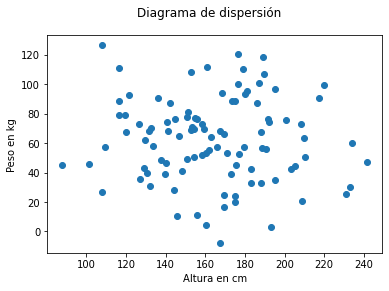

In [ ]:
#Calculamos la correlación entre la Altura y el Peso del subconjunto de datos
subconjunto.corr() #Vemos que la correlación es muy baja y negativa (algo que no tiene sentido, pero que está producido porque los números son aleatorios)
#Comprobamos con un diagrama de dispersión que no se aprecia recta de regresión ninguna:
figure, ax = plt.subplots(1, 1)
figure.suptitle('Diagrama de dispersión')
ax.scatter(x = subconjunto["Altura"], y = subconjunto["Peso"])
ax.set(xlabel="Altura en cm",ylabel="Peso en kg")

### Filtrado de datos
Otra forma de extraer subconjuntos de datos consiste en filtrar los mismos en función de una serie de condiciones. Veamos algunos ejemplos:

In [ ]:
#Extraemos todas las observaciones con unos ingresos mensuales inferiores a 3000:
filtrado1 = datos_final[datos_final["Ingresos mensuales"] < 3000]
#Extraemos las observaciones con una altura superior a 180 cm y un peso superior a 80 kg:
filtrado2 = datos_final[(datos_final["Altura"] > 180)  & (datos_final["Peso"] > 80)]
#Extraemos las observaciones cuya altura sea inferior a 100 cm o su peso inferio a 45 kg:
filtrado3 = datos_final[(datos_final["Altura"] < 100)  | (datos_final["Peso"] < 45)]
#Extraemos las observaciones cuya altura en cm sea inferior a su peso en kg:
filtrado4 = datos_final[datos_final["Altura"] < datos_final["Peso"]]
#Vemos las primeras observaciones para cada uno de estos nuevos dataframes:
print("filtrado1", "\n", filtrado1.head(), "\n", "filtrado2", "\n", filtrado2.head(), "\n", "filtrado3", "\n",  filtrado3.head(), "\n", "filtrado4", "\n",  filtrado4.head())
#El primer dataframe está vacío ya que no hay ninguna observación con unos ingresos mensuales inferiores a 3000

filtrado1 
 Empty DataFrame
Columns: [Sexo, Altura, Peso, Edad, Ingresos mensuales, Estatus laboral]
Index: [] 
 filtrado2 
       Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                      ...                                     
4   Hombre  181.956833  ...        21814.721938          Ocupado
11   Mujer  185.889469  ...        23621.030148           Parado
16  Hombre  202.313747  ...        20125.773069          Ocupado
19  Hombre  186.913889  ...        19292.195507          Ocupado
26   Mujer  186.075680  ...        17425.254537           Parado

[5 rows x 6 columns] 
 filtrado3 
       Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                      ...                                     
3    Mujer  185.470747  ...        18340.272891          Ocupado
6   Hombre  216.819149  ...        21641.779924          Ocupado
8   Hombre  194.644670  ...        16604.678145          Ocupado
9    Mujer  157.971773  ...        20467.188028           P

### Diagrama de caja y bigotes (*box-plot*):
Este tipo de gráfico resumen mucha información en poco espacio, siendo muy útil para la detección de outliers.

       Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                       ...                                     
296  Hombre  239.892890  ...        19486.229331          Ocupado
297   Mujer  200.695104  ...        19841.975043           Parado
298  Hombre   99.387916  ...        15027.682134          Ocupado
299  Hombre   77.359026  ...        17158.010506           Parado
300  Hombre  194.105047  ...         7000.000000          Ocupado

[5 rows x 6 columns]
       Sexo      Altura  ...  Ingresos mensuales  Estatus laboral
ID                       ...                                     
296  Hombre  239.892890  ...        19486.229331          Ocupado
297   Mujer  200.695104  ...        19841.975043           Parado
298  Hombre   99.387916  ...        15027.682134          Ocupado
299  Hombre   77.359026  ...        17158.010506           Parado
300  Hombre  194.105047  ...         7000.000000          Ocupado

[5 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


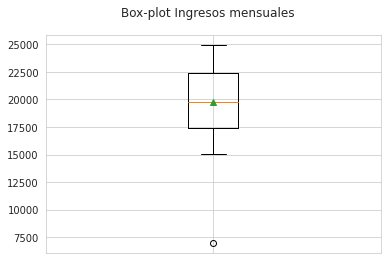

In [ ]:
#Diagrama de caja y bigotes:
print(datos_final.tail())
datos_final["Ingresos mensuales"][300] = 7000 #Introducimos un outlier cambiando los ingresos mensuales de la última observación (la 300) por 7000
print(datos_final.tail())
%matplotlib inline
figure, ax = plt.subplots(1,1)
figure.suptitle('Box-plot Ingresos mensuales')
ax.boxplot(datos_final["Ingresos mensuales"],showmeans=True)
ax.set_xticklabels([]) #Para quitar el tick y el 1 que viene pr defecto en el eje x
ax.xaxis.set_ticks_position('none') #Para quitar el tick y el 1 que viene pr defecto en el eje x
#La media es el triángulo verde y la mediana, la línea naranja
#El círculito de abajo es el outlier